<a href="https://colab.research.google.com/github/mathewrtaylor/NumPy_Introduction/blob/main/Introduction_to_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy Introduction

https://numpy.org/doc/stable/user/index.html

In [1]:
import numpy as np

In [2]:
first_array = np.array([1,2,3,4,5])
normal_list = [1,2,3,4,5]
print(first_array, normal_list)

[1 2 3 4 5] [1, 2, 3, 4, 5]


In [3]:
print(first_array.dtype)
print(type(normal_list))

int64
<class 'list'>


<center><a href="https://digitalmediaglobe.com/wp-content/uploads/2020/09/one-byte-8-bits.jpg">Bits and Bytes</a></center>
<img src="https://digitalmediaglobe.com/wp-content/uploads/2020/09/one-byte-8-bits.jpg">

In [4]:
first_array.nbytes

40

In [5]:
import sys
print(sys.getsizeof(normal_list))

112


<center><a href="https://pbpython.com/images/pandas_dtypes.png">Data Types</a></center>
<img src="https://pbpython.com/images/pandas_dtypes.png">

In [6]:
# It's all about size!!
# Using https://numpy.org/doc/stable/reference/generated/numpy.iinfo.html
# Machine limits for integer types.

sizes_array = [['8 bit',np.iinfo(np.uint8),np.iinfo(np.int8)],
        ['16 bit',np.iinfo(np.uint16),np.iinfo(np.int16)],
        ['32 bit',np.iinfo(np.uint32),np.iinfo(np.int32)],
        ['64 bit',np.iinfo(np.uint64),np.iinfo(np.int64)],
        ['Plain int',np.iinfo(np.uint),np.iinfo(int)]]

print('Bit Length, Unsigned,Signed','\n\n',sizes_array[0],'\n',sizes_array[1],'\n',sizes_array[2],'\n',sizes_array[3],'\n',sizes_array[4])

Bit Length, Unsigned,Signed 

 ['8 bit', iinfo(min=0, max=255, dtype=uint8), iinfo(min=-128, max=127, dtype=int8)] 
 ['16 bit', iinfo(min=0, max=65535, dtype=uint16), iinfo(min=-32768, max=32767, dtype=int16)] 
 ['32 bit', iinfo(min=0, max=4294967295, dtype=uint32), iinfo(min=-2147483648, max=2147483647, dtype=int32)] 
 ['64 bit', iinfo(min=0, max=18446744073709551615, dtype=uint64), iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)] 
 ['Plain int', iinfo(min=0, max=18446744073709551615, dtype=uint64), iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)]


In [7]:
second_array = np.array([1,2,3,4,5],dtype='uint8')
print(f'The byte size of the second array is {second_array.nbytes} bytes.')
print(f'The byte size of the normal list is {sys.getsizeof(normal_list)} bytes.')

The byte size of the second array is 5 bytes.
The byte size of the normal list is 112 bytes.


## More Memory Management

<center><a href="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png">Memory Allocation</a></center>
<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png">

<center><a href="https://soshace.com/wp-content/uploads/2019/10/Python-Array-Explained-and-Visualized-python-arrays-vs.-python-loops.png">Arrays vs Lists</a></center>
<img src="https://soshace.com/wp-content/uploads/2019/10/Python-Array-Explained-and-Visualized-python-arrays-vs.-python-loops.png">

## Speed Run Time

## Vectorization
### Shifting into a lower level language within Python for increased performancce

In [8]:
# Normal calculations
# multiply 1.0000001 by itself 500,000,000 times

from timeit import timeit
import numpy as np

import_setup = '''
import numpy as np
from __main__ import func

'''

number = 1
loop_number = 1

# Making a for loop to iterate through a list
def func():
    global number
    for i in range(500000000):
        number *= 1.0000001
    return number

t1 = timeit('func()',setup=import_setup, number=loop_number)
## One Liner to accomplish the same way through vectorization
t2 = timeit('np.power(1.0000001, 500000000)',setup=import_setup, number=loop_number)
    
print(number)
print(f'Time taken by list looping was {t1} seconds.')
print(f'Time taken by vectorized array computations was {t2} seconds.')
print('Speed difference: {:0.1f}x'.format(t1 / t2))

5.184692718198372e+21
Time taken by list looping was 44.038163205000046 seconds.
Time taken by vectorized array computations was 0.0001535430000103588 seconds.
Speed difference: 286813.2x


In [9]:
# Numpy array calculations
# multiply 1.0000001 by itself 7,000,000,000 times!!

import time
import numpy as np

# Timing
start_time = time.time()
starting = time.strftime("%a, %d %b %Y %H:%M:%S:%m", time.localtime())

# Setting Variables
num_multiplies = 7000000000
data = range(num_multiplies)
number = 1

# Vector math
number *= np.power(1.0000001, num_multiplies)

# Timing cont'd
end_time = time.time()
ending = time.strftime("%a, %d %b %Y %H:%M:%S:%m", time.localtime())

print(number)
print(f'Start time is: {starting}')
print(f'End time is: {ending}')
print(f'Run time = {(end_time - start_time)}')

1.0141969717459648e+304
Start time is: Thu, 04 Nov 2021 15:29:24:11
End time is: Thu, 04 Nov 2021 15:29:24:11
Run time = 0.00020599365234375


In [10]:
# Looking at the difference, a million true false choices, a thousand times over!
# counting how many times false and true / true and false occur back to back
from timeit import timeit
import numpy as np

import_setup = '''
import numpy as np
from __main__ import count_transitions,x

'''
x = np.random.choice([False, True], size=1000000) 

# Making a for loop to iterate through a list, matching the last two choices, opposites are a match
def count_transitions(x) -> int:
     count = 0
     for i, j in zip(x[:-1], x[1:]):
         if j and not i:
             count += 1
     return count

num = 1000
starting_t1 = time.strftime("%a, %d %b %Y %H:%M:%S:%m", time.localtime())
t1 = timeit('count_transitions(x)', setup=import_setup, number=num)
## One Liner to accomplish the same way through vectorization
starting_t2 = time.strftime("%a, %d %b %Y %H:%M:%S:%m", time.localtime())
t2 = timeit('np.count_nonzero(x[:-1] < x[1:])', setup=import_setup, number=num)

# And survey says...
print(f'Started list looping at {starting_t1} and took {t1} seconds.')
print(f'Started vectorized array computations at {starting_t2} and took {t2} seconds.')
print('Speed difference: {:0.1f}x'.format(t1 / t2))

Started list looping at Thu, 04 Nov 2021 15:29:29:11 and took 90.33304738599998 seconds.
Started vectorized array computations at Thu, 04 Nov 2021 15:30:59:11 and took 1.392168588000004 seconds.
Speed difference: 64.9x


## Broadcasting

According to SciPy.org <br>
<i>"The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation."</i> <br>
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html


In [11]:
# an array and a scalar addition
a = np.array([1,2,3,4,5])
b = np.array([2])

c = a * b
print(f'a shape is: {a.shape}.')
print(f'b shape is: {b.shape}.')
# array matching is matched RIGHT to LEFT, so... since the shapes are:
# a = (1,5) and 
# b = (1,1), the first 1 acts like a wildcard, and takes the shape of A by broadcasting its value
# the second one (left most) grabs the other 1, so stays the same, becoming
# b = (1,5)
# so b becomes [2,2,2,2,2] (only for demonstrating) and the equation becomes:
# [1,2,3,4,5] * [2,2,2,2,2], then instead of looping, it vectorizes it

print(f'c result is: {c}.')
print(f'c shape is: {c.shape}.')

a shape is: (5,).
b shape is: (1,).
c result is: [ 2  4  6  8 10].
c shape is: (5,).


In [12]:
# Let's get a little more complex
a = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
b = np.array([[10],[20],[30]])

c = a * b
print(f'a shape is: {a.shape}.')
print(f'b shape is: {b.shape}.')
# array matching is matched RIGHT to LEFT, so...
# a = (3,5)
# b = (3,1)
# Since the shape of b is 3,1 and the 1 acts like a wildcard, the 1 becomes a 5
# The 3's match, so nothing happens with them, becoming:
# b = (3,5)
# so b becomes [[10,10,10,10,10],[20,20,20,20,20],[30,30,30,30,30]] (only for demonstrating) and the equation becomes:
# [[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]] * [[10,10,10,10,10],[20,20,20,20,20],[30,30,30,30,30]], then instead of 
# looping, it vectorizes it

print(f'c result is: {c}.')
print(f'c shape is: {c.shape}.')

a shape is: (3, 5).
b shape is: (3, 1).
c result is: [[ 10  20  30  40  50]
 [120 140 160 180 200]
 [330 360 390 420 450]].
c shape is: (3, 5).


In [13]:
# When shaping doesn't work
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2])
# array matching is matched RIGHT to LEFT, so...
# a = (2,3)
# b = (1,2)
# This time, the 3 and the 2 Do NOT Match and we get an error:
print(f'a shape is: {a.shape}.')
print(f'b shape is: {b.shape}.')
c = a + b
print(c)

a shape is: (2, 3).
b shape is: (2,).


ValueError: ignored

In [14]:
# Carrying the 1
a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]])
b = np.array([1,2,3])
print(f'a shape is: {a.shape}.')
print(f'b shape is: {b.shape}.')
# array matching is matched RIGHT to LEFT, so...
# if we line up a and b shapes, they become:
# a = (4,3)
# b = (#,3), we can use 1 as a place holder for anything missing to the left, so b becomes
# b = (1,3)
# The 3's match, so nothing happens with them
# The one being a wildcard, becomes a 4 and becomes
# b = (4,3)
# so b becomes [[1,2,3],[1,2,3],[1,2,3],[1,2,3]] (only for demonstrating) and the equation becomes:
# [[0,0,0],[10,10,10],[20,20,20],[30,30,30]] + [[1,2,3],[1,2,3],[1,2,3],[1,2,3]]

c = a + b
print(f'c result is: {c}.')
print(f'c shape is: {c.shape}.')


a shape is: (4, 3).
b shape is: (3,).
c result is: [[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]].
c shape is: (4, 3).


## Playing with arrays

<center><a href="https://images.pexels.com/photos/1280560/pexels-photo-1280560.jpeg">5 cars Parked</a></center>
<img src="https://images.pexels.com/photos/1280560/pexels-photo-1280560.jpeg">

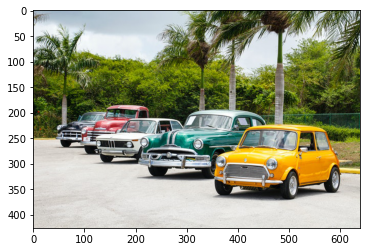

In [22]:
# Importing the image as an array
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = np.array(Image.open('pexels-jose-mueses-1280560.jpg'))
data = image
plt.imshow(data);

In [23]:
# Looking at what we have
print(f'The image is now a: {type(data)}.')
print(f'The shape of the array is: {data.shape}.')

The image is now a: <class 'numpy.ndarray'>.
The shape of the array is: (426, 640, 3).


In [24]:
# Looking at the 3rd part of the array at a randomly chosen pixel
data[350,300]

array([226, 225, 221], dtype=uint8)

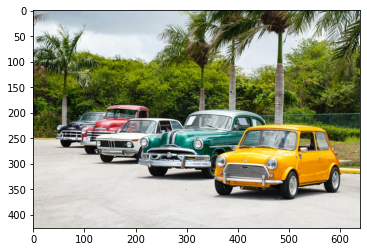

In [25]:
# Playing with Pixels
data[350,300] = [0, 0, 0]
plt.imshow(data);
data[350,300] = [226, 225, 221]

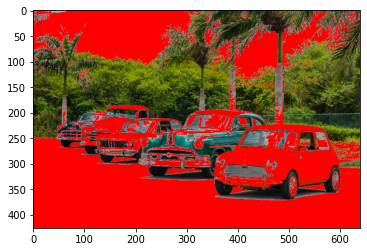

In [26]:
# But there's more!!
colored_data = data
coloring = colored_data[:, :, 0] > 160
colored_data[coloring] = [255, 0, 0]
plt.imshow(colored_data);

In [27]:
# Change the array back to an image
colored_image= Image.fromarray(colored_data).save('colored_cars.png')

<b>Further Resources:</b> <br>
Data types - https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html <br>
Numpy Speed - https://towardsdatascience.com/one-simple-trick-for-speeding-up-your-python-code-with-numpy-1afc846db418 <br>
Numpy Speed(2) - https://realpython.com/numpy-array-programming/ <br>
Illustrated guide to NumPy - https://www.mybluelinux.com/numpy-illustrated-the-visual-guide-to-numpy/ <br>
Python Array Explained and Visualized - https://soshace.com/python-array-explained-and-visualized/ <br>
Numpy Array Broadcasting In Python Explained - https://www.youtube.com/watch?v=oG1t3qlzq14 <br>
Python NumPy For Your Grandma - 3.1 Broadcasting - https://www.youtube.com/watch?v=K96OoAWbhBE <br>
Image editing with NumPy  - https://note.nkmk.me/en/python-numpy-image-processing/ <br>